# Data Cleaning

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read data
maintenance_df = pd.read_csv('maintenance_order.csv')
production_df = pd.read_csv('production_logs.csv')
cross_ref_df = pd.read_csv('cross_reference.csv')

# Display basic information of DataFrames
print("Maintenance Orders Info:")
print(maintenance_df.info())
print("\nProduction Logs Info:")
print(production_df.info())
print("\nCross Reference Info:")
print(cross_ref_df.info())

Maintenance Orders Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ORDER             388 non-null    int64 
 1   BASIC_START_DATE  388 non-null    object
 2   EQUIPMENT_ID      388 non-null    int64 
 3   ORDER_TYPE        388 non-null    object
 4   DESCRIPTION       388 non-null    object
dtypes: int64(2), object(3)
memory usage: 15.3+ KB
None

Production Logs Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167946 entries, 0 to 167945
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   PRODUCTIONDATE_DAY_LOC     167946 non-null  object 
 1   SHIFT_NAME                 167946 non-null  object 
 2   LINE_NAME                  167946 non-null  object 
 3   CO_TYPE                    145176 non-null  object 
 4   CREW_ID     

## Production Dataset

In [ ]:
production_df

,PRODUCTIONDATE_DAY_LOC,SHIFT_NAME,LINE_NAME,CO_TYPE,CREW_ID,AE_MODEL_CATEGORY,SIZE_TYPE,SHIFT_NAME.1,UTIL_REASON_DESCRIPTION,DOWNTIME,...,PRODUCTION_AVAILABLE_TIME,REJECT_PRODUCTION_QTY,RUN_TIME,CHANGEOVER_DURATION,CLEANING_AND_SANITIZATION,BUSINESS_EXTERNAL_TIME,PLANNED_MAINTENANCE,TOTAL_TIME,WAITING_TIME,PRODUCTION_ORDER_RATE
0,2025-05-26,Night-3,MKBC0202,Material_Filament,A,Runtime,Pro-Clean 5000,Night-3,Running,0,...,331,0,331,0,0,0,0,331,0,244.20
1,2025-06-21,Night-3,MKZA1601,Material_Handle,A,Runtime,Precision Grip 2.0,Night-3,Running,0,...,269,0,269,0,0,0,0,269,0,67.00
2,2025-04-01,Night-3,MKZA1401,Material_Filament,B,Runtime,ActiveClean Guard,Night-3,Running,0,...,398,0,398,0,0,0,0,398,0,134.00
3,2025-06-18,Night-3,MHPT2304,Material_Filament,A,Unplanned,Total Defense Shield,Night-3,18-Autofeeder - 1801-Double hadle on chain,15,...,15,0,0,0,0,0,0,15,0,63.16
4,2025-04-10,Night-3,MKZA1701,Material_Filament,A,Unplanned,Classic Clean 100,Night-3,16-Autosorter - 1601-Handle on chain stuck,12,...,12,0,0,0,0,0,0,12,0,67.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167941,2025-02-10,Day-1,MHPT2301,Material_Handle,B,Plant Decision,NaN,Day-1,Lunch/Break,0,...,0,0,0,0,0,0,0,5,0,NaN
167942,2025-06-20,Afternoon-2,MHPT2304,Material_Filament,C,Unplanned,Total Defense Shield,Afternoon-2,12-Filling tool - 1202-Replace jaw mechanical,15,...,15,0,0,0,0,0,0,15,0,63.16
167943,2025-05-10,Afternoon-2,MKTU2006,Bundle_Material,C,Plant Decision,NaN,Afternoon-2,Planned Maintenance,0,...,0,0,0,0,0,0,2,2,0,NaN
167944,2025-04-29,Day-1,MHPT2305,Bundle_Material,C,Plant Decision,NaN,Day-1,Planned Maintenance,0,...,0,0,0,0,0,0,8,8,0,NaN


In [ ]:
production_df.describe()

,DOWNTIME,EFFECTIVE_RUNTIME,GOOD_PRODUCTION_QTY,LUNCH_AND_BREAK,MEETING_AND_TRAINING,NO_DEMAND,PLANT_AVAILABLE_TIME,PLANT_EXPERIMENTATION,PRODUCTION_AVAILABLE_TIME,REJECT_PRODUCTION_QTY,RUN_TIME,CHANGEOVER_DURATION,CLEANING_AND_SANITIZATION,BUSINESS_EXTERNAL_TIME,PLANNED_MAINTENANCE,TOTAL_TIME,WAITING_TIME,PRODUCTION_ORDER_RATE
count,167946.000000,104949.000000,167946.000000,167946.000000,167946.000000,167946.000000,167946.000000,167946.000000,167946.000000,167946.000000,167946.000000,167946.000000,167946.000000,167946.000000,167946.000000,167946.000000,167946.0,104949.000000
mean,7.572720,65.493781,2643.169007,1.808498,0.076078,12.625612,54.851941,0.105331,48.985317,43.061591,41.412597,0.684952,1.812386,27.400212,1.186893,82.252152,0.0,77.033820
std,19.749306,141.856646,7938.138519,7.190068,2.864279,76.120952,115.305862,3.341618,116.081637,132.031162,117.098792,8.527059,5.487821,110.828209,15.107859,150.241160,0.0,41.525277
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,20.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,60.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.0,78.900000
75%,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.0,81.400000
max,480.000000,695.652174,46100.000000,60.000000,360.000000,480.000000,480.000000,480.000000,480.000000,3000.000000,473.000000,650.000000,60.000000,480.000000,480.000000,480.000000,0.0,344.000000


In [ ]:
production_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167946 entries, 0 to 167945
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   PRODUCTIONDATE_DAY_LOC     167946 non-null  object 
 1   SHIFT_NAME                 167946 non-null  object 
 2   LINE_NAME                  167946 non-null  object 
 3   CO_TYPE                    145176 non-null  object 
 4   CREW_ID                    167787 non-null  object 
 5   AE_MODEL_CATEGORY          148392 non-null  object 
 6   SIZE_TYPE                  104949 non-null  object 
 7   SHIFT_NAME.1               167946 non-null  object 
 8   UTIL_REASON_DESCRIPTION    148392 non-null  object 
 9   DOWNTIME                   167946 non-null  int64  
 10  EFFECTIVE_RUNTIME          104949 non-null  float64
 11  GOOD_PRODUCTION_QTY        167946 non-null  int64  
 12  LUNCH_AND_BREAK            167946 non-null  int64  
 13  MEETING_AND_TRAINING       16

In [ ]:
# 1. Check and handle duplicate data
print("Checking duplicates:")
print("Production duplicates:", production_df.duplicated().sum())

Checking duplicates:
Production duplicates: 0


In [ ]:
# Find the most common value (mode) of each column
most_common_values = production_df.mode().iloc[0]

# Count the frequency of occurrence of the most common value
most_common_counts = production_df.apply(lambda x: x.value_counts().iloc[0] if x.notna().any() else None)

# Calculate the percentage of occurrence of the most common value
most_common_percent = (most_common_counts / len(production_df)) * 100

# Combine results into a summary table
mode_summary = pd.DataFrame({
    'Most_Common_Value': most_common_values,
    'Count': most_common_counts,
    'Percent': most_common_percent
})

print(mode_summary)

                              Most_Common_Value   Count     Percent
PRODUCTIONDATE_DAY_LOC               2025-02-20    1278    0.760959
SHIFT_NAME                                Day-1   56851   33.850762
LINE_NAME                              MKBC0202    4530    2.697296
CO_TYPE                         Material_Handle   73758   43.917688
CREW_ID                                       C   57143   34.024627
AE_MODEL_CATEGORY                Plant Decision   61424   36.573661
SIZE_TYPE                  Total Defense Shield   17095   10.178867
SHIFT_NAME.1                              Day-1   56851   33.850762
UTIL_REASON_DESCRIPTION                 Running   20173   12.011599
DOWNTIME                                      0  111110   66.158170
EFFECTIVE_RUNTIME                           0.0   85511   50.915771
GOOD_PRODUCTION_QTY                           0  148508   88.426042
LUNCH_AND_BREAK                               0  156311   93.072178
MEETING_AND_TRAINING                          0 

In [ ]:
# Mising data analysis
total = production_df.isnull().sum().sort_values(ascending=False)
percent = (production_df.isnull().sum()/production_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
SIZE_TYPE,62997,0.375103
EFFECTIVE_RUNTIME,62997,0.375103
PRODUCTION_ORDER_RATE,62997,0.375103
CO_TYPE,22770,0.135579
UTIL_REASON_DESCRIPTION,19554,0.116430
AE_MODEL_CATEGORY,19554,0.116430
CREW_ID,159,0.000947
LINE_NAME,0,0.000000
SHIFT_NAME,0,0.000000
SHIFT_NAME.1,0,0.000000


In [ ]:
production_df.dtypes

,0
PRODUCTIONDATE_DAY_LOC,object
SHIFT_NAME,object
LINE_NAME,object
CO_TYPE,object
CREW_ID,object
AE_MODEL_CATEGORY,object
SIZE_TYPE,object
SHIFT_NAME.1,object
UTIL_REASON_DESCRIPTION,object
DOWNTIME,int64


                           DOWNTIME  EFFECTIVE_RUNTIME  GOOD_PRODUCTION_QTY  \
DOWNTIME                   1.000000          -0.234538            -0.127676   
EFFECTIVE_RUNTIME         -0.234538           1.000000             0.946515   
GOOD_PRODUCTION_QTY       -0.127676           0.946515             1.000000   
LUNCH_AND_BREAK           -0.096447                NaN            -0.083752   
MEETING_AND_TRAINING      -0.010185                NaN            -0.008844   
NO_DEMAND                 -0.063599                NaN            -0.055228   
PLANT_AVAILABLE_TIME       0.014053          -0.264966            -0.158398   
PLANT_EXPERIMENTATION     -0.012087                NaN            -0.010496   
PRODUCTION_AVAILABLE_TIME  0.033337          -0.260795            -0.140511   
REJECT_PRODUCTION_QTY     -0.125059           0.854211             0.835253   
RUN_TIME                  -0.135607          -0.214771            -0.117758   
CHANGEOVER_DURATION       -0.030801          -0.0470

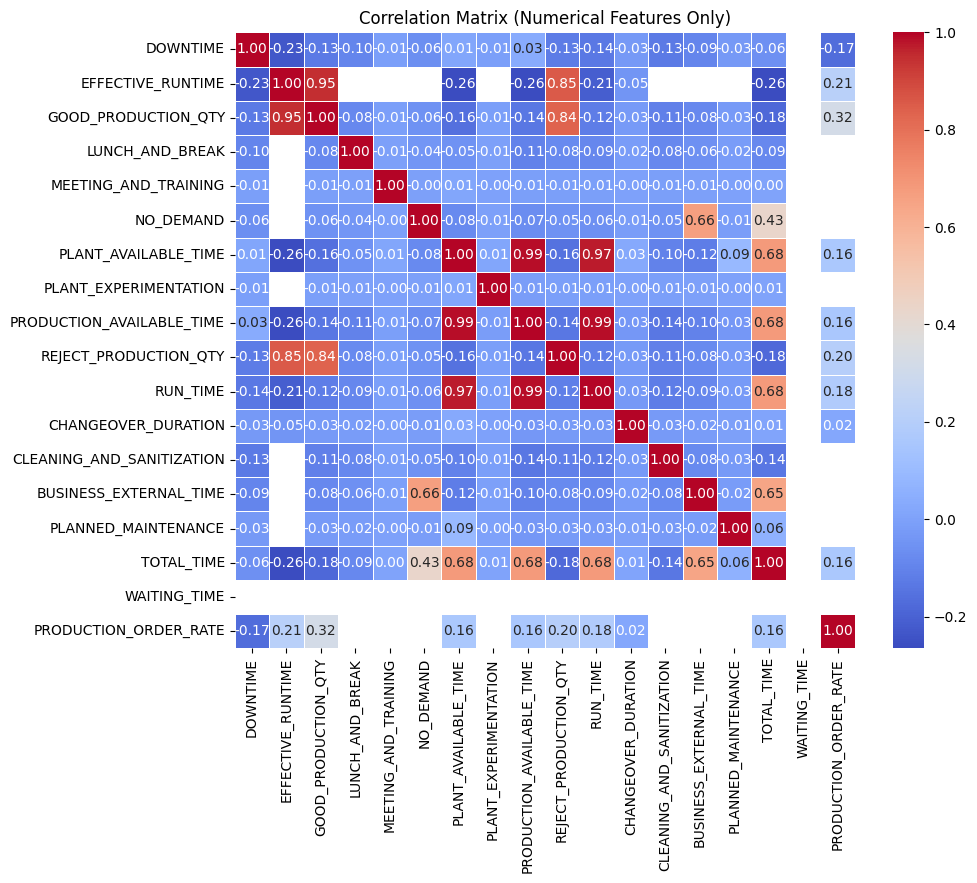

In [ ]:
# Select only numerical columns
numeric_df = production_df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Display the correlation matrix
print(corr_matrix)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix (Numerical Features Only)")
plt.show()

### Effective Runtime Processing

> **Comment on data:**

- When observing the data, we notice that within each group (LINE_NAME, PRODUCTIONDATE_DAY_LOC, SHIFT_NAME), there is always a unique record representing the aggregated performance (summary record) of the production shift for the corresponding day and production line.

- This record is identified by having a value in the EFFECTIVE_RUNTIME column, while other records within the same group are detailed component records that reflect individual types of activities or specific machine states.

> **Processing direction:**

- Since only the summary record contains valid information about the effective runtime (EFFECTIVE_RUNTIME), the other records within the same group do not have a value in this column (displayed as NULL).

- We replace the null values in the EFFECTIVE_RUNTIME column with 0 to indicate that the detailed records do not contribute additionally to the effective runtime.

In [ ]:
production_df['EFFECTIVE_RUNTIME'] = (
    production_df.groupby(['LINE_NAME', 'PRODUCTIONDATE_DAY_LOC', 'SHIFT_NAME'])['EFFECTIVE_RUNTIME']
    .transform(lambda x: x.fillna(0)))

In [ ]:
production_df['EFFECTIVE_RUNTIME'].isna().sum()

np.int64(0)

### PRODUCTION RATE Processing

> **Comment on data**

- We observe that the null values in the SIZE_TYPE column exactly match the null values in the PRODUCTION_ORDER_RATE column.

- This indicates a logical relationship between the two fields: if a production shift has no product (SIZE_TYPE is not defined), then there is no corresponding ideal production rate (PRODUCTION_ORDER_RATE).

>  **Processing direction**

- Based on this relationship, it can be inferred that the records with no SIZE_TYPE value represent time periods when the production line was not performing actual manufacturing activities.
- Therefore, to ensure data integrity when calculating performance metrics (such as Performance or OEE), we replace the null values in the PRODUCTION_ORDER_RATE column with 0, reflecting that in these cases, there is no ideal production output to be achieved.

In [ ]:
# Fill null = 0
production_df['PRODUCTION_ORDER_RATE'] = production_df['PRODUCTION_ORDER_RATE'].fillna(0)

In [ ]:
production_df['PRODUCTION_ORDER_RATE'].isna().sum()

np.int64(0)

### Size_Type Processing

**Activity classification**: From the dataset, we observe that Size Type has null values only in two cases — when the AE MODEL CATEGORY is either Business External or Plant Decision.

- **Business external acitivities**: Not a production activity → No Production


- **Plant decision - Group A**:
  - Autonomous Maintenance
  - Cleaning and Sanitation  
  - Lunch/Break
  - Meeting
  - Planned Maintenance
  - Plant Experimentation
  - Training

  → Activities not directly related to production, where the machines are not running → no products are generated.

- **Plant decision  Group B**:
  - Bundle Material
  - Material Filament
  - Material Handle  
  - Tooling

  → Activities related to production changeover or preparation, where the product size still needs to be specified; however, these records are not null.

**Processing direction:**

=> Fill all of them with "Unknown", treating them as No Production.

In [ ]:
# Sort data
production_df.sort_values(by=['LINE_NAME', 'PRODUCTIONDATE_DAY_LOC', 'SHIFT_NAME'], inplace=True)

# Forward fill
production_df['SIZE_TYPE'] = production_df['SIZE_TYPE'].fillna("Unknown")


### CO_TYPE and CREW_ID Processing

> **Comment on data:**

Based on the data analysis, we observed that the missing values in the 'CO_TYPE' and 'CREW_ID' columns need to be handled carefully to avoid distorting the analytical results. The applied approach involves filling the missing values hierarchically, based on the most frequent (mode) values within different data groupings.

1.  **Level 1 (Line + Date + Shift):** First, we attempt to fill the missing values using the mode within the data groups defined by the combination of LINE_NAME, PRODUCTIONDATE_DAY_LOC, and SHIFT_NAME. This assumes that within the same production shift on the same line and specific day, CO_TYPE and CREW_ID tend to be similar.
2.  **Level 2 (Line + Shift):** If, after applying Level 1, there are still missing values, we continue by filling them with the mode within the data groups based only on LINE_NAME and SHIFT_NAME. This relaxes the condition on the date, assuming that CO_TYPE and CREW_ID tend to be similar within the same production shift on the same line, regardless of the specific day.
3.  **Level 3 (Line):** If missing values still remain, we fill them using the mode within the data groups based only on LINE_NAME. This considers only the production line, assuming that each line has a most common CO_TYPE and CREW_ID.
4.  **Enter the value "Unknown":** Finally, any remaining missing values after applying the above levels are filled with the value "Unknown". This allows us to easily identify the records for which CO_TYPE or CREW_ID could not be inferred from the available data.

In [ ]:
columns_to_fill = ['CO_TYPE', 'CREW_ID']

for column in columns_to_fill:
    print(f"Đang xử lý cột: {column}")

    # Level 1: mode theo Line + Date + Shift
    level1_mode = (
        production_df.groupby(['LINE_NAME', 'PRODUCTIONDATE_DAY_LOC', 'SHIFT_NAME'])[column]
        .transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
    )
    production_df[column] = production_df[column].fillna(level1_mode)

    # Level 2: mode theo Line + Shift
    level2_mode = (
        production_df.groupby(['LINE_NAME', 'SHIFT_NAME'])[column]
        .transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
    )
    production_df[column] = production_df[column].fillna(level2_mode)

    # Level 3: mode theo Line
    level3_mode = (
        production_df.groupby(['LINE_NAME'])[column]
        .transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
    )
    production_df[column] = production_df[column].fillna(level3_mode)

    # Finally fill Unknown
    production_df[column] = production_df[column].fillna('Unknown')

    print(f"→ Đã fill xong {column}, còn thiếu: {production_df[column].isna().sum()} giá trị\n")


Đang xử lý cột: CO_TYPE
→ Đã fill xong CO_TYPE, còn thiếu: 0 giá trị

Đang xử lý cột: CREW_ID
→ Đã fill xong CREW_ID, còn thiếu: 0 giá trị



### AE_MODEL and UTILS Processing

> **Comment on data:**

- When examining the data, we observe that within each group defined by (LINE_NAME, PRODUCTIONDATE_DAY_LOC, SHIFT_NAME), there is always a record representing the aggregated performance (summary record) of the production shift for the corresponding day and production line.
- It is also the only record within each group that has values in the columns EFFECTIVE_RUNTIME, GOOD_PRODUCTION_QTY, and REJECT_PRODUCTION_QTY, while AE_MODEL and UTILS contain null values only in those records. This further confirms that these records are summary records rather than specific machine states within that day, shift, and production line.

> **Processing direction:**

- We replace the null values in the AE_MODEL and UTILS columns with "Unknown", treating them as cases where no specific machine state is present.

In [ ]:
production_df[['AE_MODEL_CATEGORY', 'UTIL_REASON_DESCRIPTION']] = (
    production_df[['AE_MODEL_CATEGORY', 'UTIL_REASON_DESCRIPTION']].fillna('Unknown')
)

In [ ]:
production_df

,PRODUCTIONDATE_DAY_LOC,SHIFT_NAME,LINE_NAME,CO_TYPE,CREW_ID,AE_MODEL_CATEGORY,SIZE_TYPE,SHIFT_NAME.1,UTIL_REASON_DESCRIPTION,DOWNTIME,...,PRODUCTION_AVAILABLE_TIME,REJECT_PRODUCTION_QTY,RUN_TIME,CHANGEOVER_DURATION,CLEANING_AND_SANITIZATION,BUSINESS_EXTERNAL_TIME,PLANNED_MAINTENANCE,TOTAL_TIME,WAITING_TIME,PRODUCTION_ORDER_RATE
116240,2025-01-01,Afternoon-2,MAFT2201,Material_Handle,C,Business External,Unknown,Afternoon-2,Holiday,0,...,0,0,0,0,0,480,0,480,0,0.0
150952,2025-01-01,Day-1,MAFT2201,Material_Handle,B,Business External,Unknown,Day-1,Holiday,0,...,0,0,0,0,0,480,0,480,0,0.0
104621,2025-01-01,Night-3,MAFT2201,Material_Handle,A,Business External,Unknown,Night-3,Holiday,0,...,0,0,0,0,0,480,0,480,0,0.0
6133,2025-01-02,Afternoon-2,MAFT2201,Material_Handle,A,Plant Decision,Unknown,Afternoon-2,Lunch/Break,0,...,0,0,0,0,0,0,0,30,0,0.0
9550,2025-01-02,Afternoon-2,MAFT2201,Material_Handle,A,Unplanned,Renew 360,Afternoon-2,12-Filling tool - 1201-Mechanical adjustment.,17,...,17,0,0,0,0,0,0,17,0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8022,2025-06-29,Day-1,MKZA1802,Material_Handle,C,Business External,Unknown,Day-1,Weekend,0,...,0,0,0,0,0,480,0,480,0,0.0
17980,2025-06-29,Night-3,MKZA1802,Material_Handle,B,Business External,Unknown,Night-3,Weekend,0,...,0,0,0,0,0,480,0,480,0,0.0
147313,2025-06-30,Afternoon-2,MKZA1802,Material_Handle,B,Business External,Unknown,Afternoon-2,No Demand,0,...,0,0,0,0,0,480,0,480,0,0.0
117951,2025-06-30,Day-1,MKZA1802,Material_Handle,A,Business External,Unknown,Day-1,No Demand,0,...,0,0,0,0,0,480,0,480,0,0.0


### Check outliers

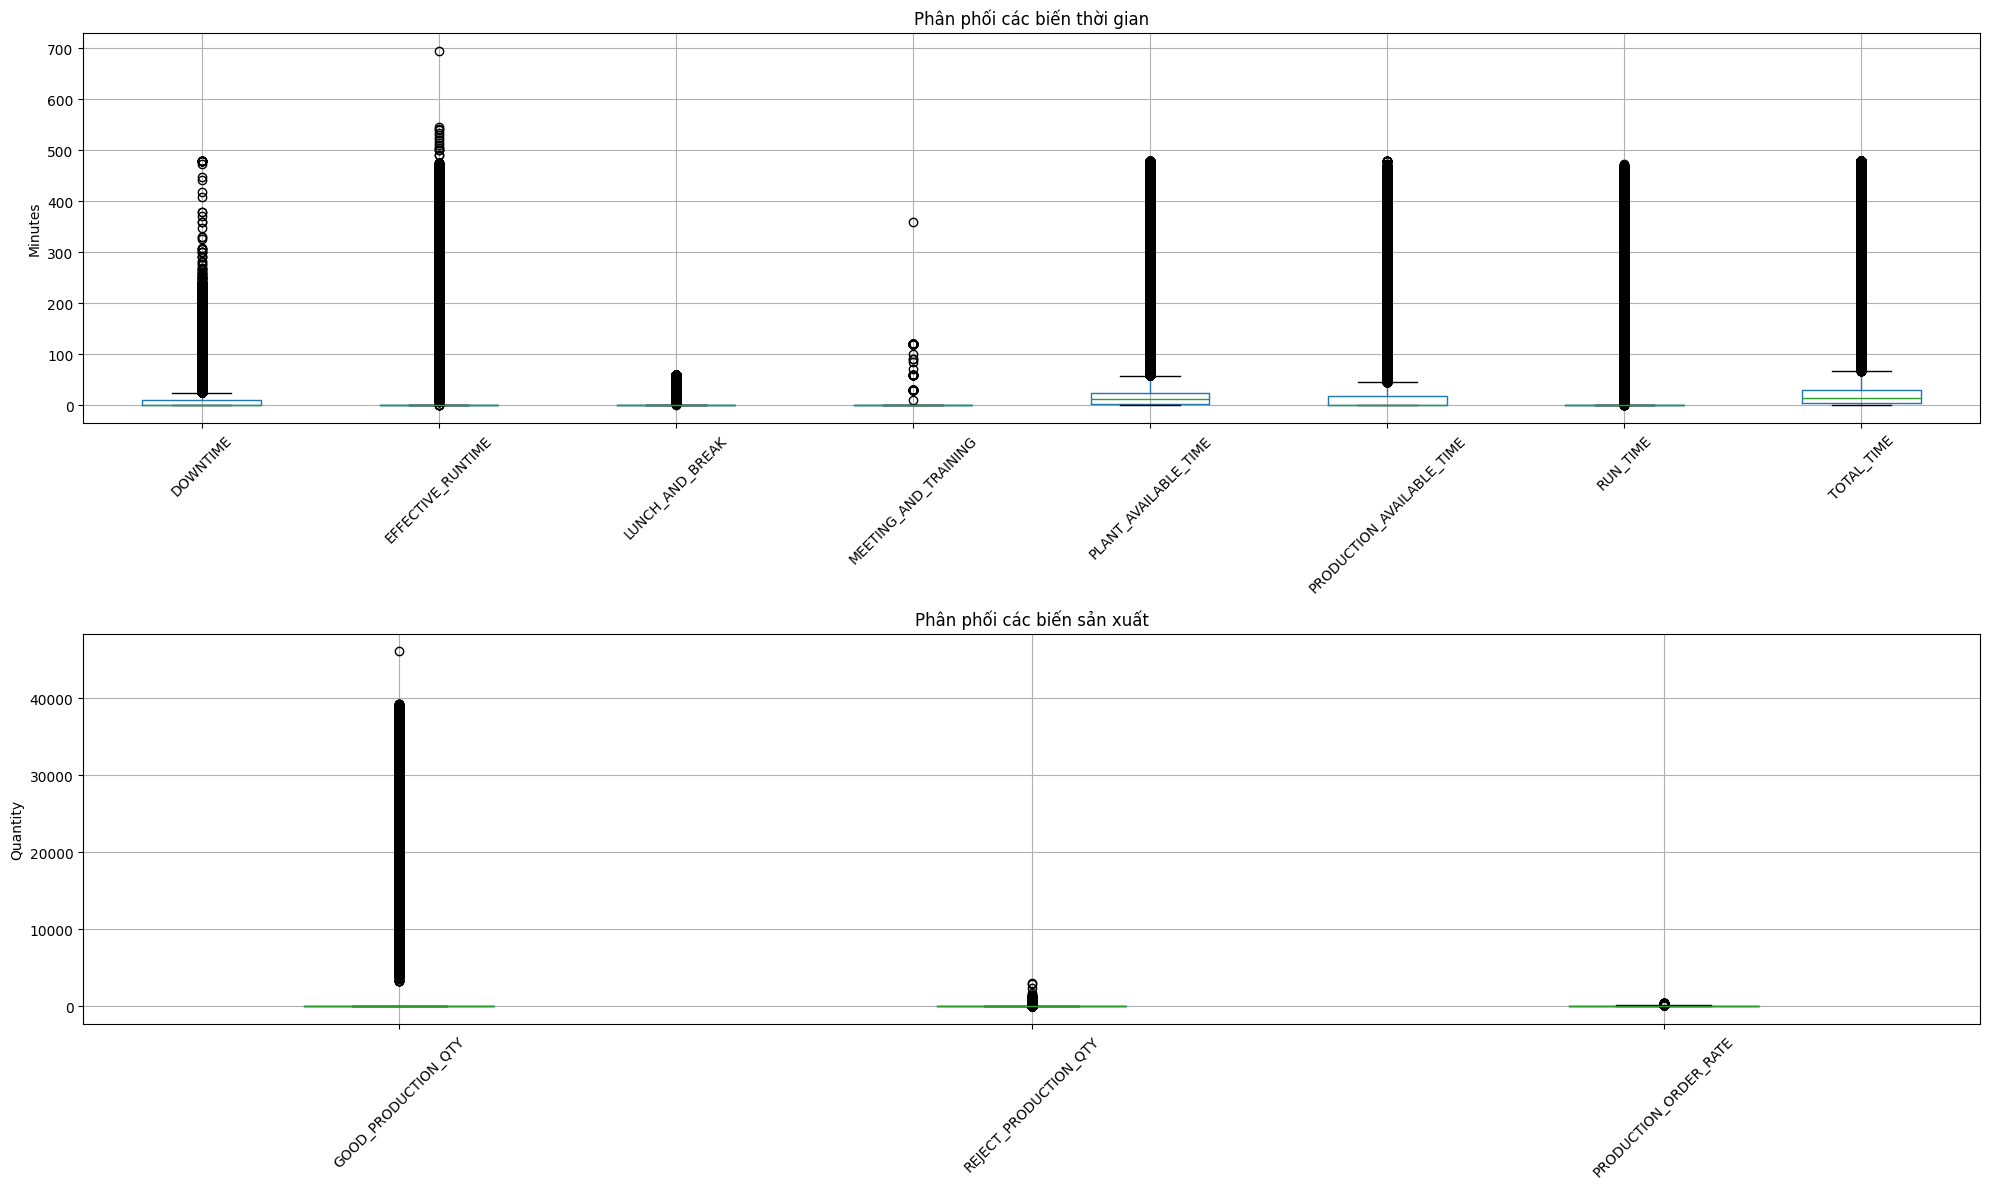


Thống kê mô tả cho các biến số:
            DOWNTIME  EFFECTIVE_RUNTIME  GOOD_PRODUCTION_QTY  LUNCH_AND_BREAK  \
count  167946.000000      167946.000000        167946.000000    167946.000000   
mean        7.572720          40.926886          2643.169007         1.808498   
std        19.749306         116.535008          7938.138519         7.190068   
min         0.000000           0.000000             0.000000         0.000000   
25%         0.000000           0.000000             0.000000         0.000000   
50%         0.000000           0.000000             0.000000         0.000000   
75%        10.000000           0.000000             0.000000         0.000000   
max       480.000000         695.652174         46100.000000        60.000000   

       MEETING_AND_TRAINING      NO_DEMAND  PLANT_AVAILABLE_TIME  \
count         167946.000000  167946.000000         167946.000000   
mean               0.076078      12.625612             54.851941   
std                2.864279      

In [ ]:
# Get numeric columns from final_df
numeric_columns = production_df.select_dtypes(include=['float64', 'int64']).columns

# Create subplots for each group of variables
plt.figure(figsize=(20, 12))

# Group 1: Time variables
time_vars = ['DOWNTIME', 'EFFECTIVE_RUNTIME', 'LUNCH_AND_BREAK', 'MEETING_AND_TRAINING',
            'PLANT_AVAILABLE_TIME', 'PRODUCTION_AVAILABLE_TIME', 'RUN_TIME', 'TOTAL_TIME']
plt.subplot(2, 1, 1)
production_df[time_vars].boxplot(figsize=(15, 6))
plt.title('Phân phối các biến thời gian')
plt.xticks(rotation=45)
plt.ylabel('Minutes')

# Group 2: Production variables
production_vars = ['GOOD_PRODUCTION_QTY', 'REJECT_PRODUCTION_QTY', 'PRODUCTION_ORDER_RATE']
plt.subplot(2, 1, 2)
production_df[production_vars].boxplot(figsize=(15, 6))
plt.title('Phân phối các biến sản xuất')
plt.xticks(rotation=45)
plt.ylabel('Quantity')

plt.tight_layout()
plt.show()

# Display basic statistics
print("\nThống kê mô tả cho các biến số:")
stats = production_df[numeric_columns].describe()
print(stats)

# Calculate the number of outliers for each variable
print("\nSố lượng outliers cho mỗi biến:")
for col in numeric_columns:
    Q1 = production_df[col].quantile(0.25)
    Q3 = production_df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = production_df[(production_df[col] < (Q1 - 1.5 * IQR)) |
                        (production_df[col] > (Q3 + 1.5 * IQR))][col]
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(production_df)*100:.2f}%)")

=== PHÂN TÍCH CÁC CỘT CATEGORICAL ===


LINE_NAME:
Số lượng giá trị unique: 53
Số lượng null: 0

Top 10 giá trị phổ biến nhất:
LINE_NAME
MKBC0202    0.026973
MKBC0901    0.026913
MKBC0902    0.025675
MKBC0101    0.025163
MKBC0102    0.025044
MKBC0201    0.024591
MKBC0502    0.024168
MKBC1102    0.023180
MKBC0501    0.022984
MKBC0302    0.022674
Name: proportion, dtype: float64
--------------------------------------------------

SHIFT_NAME:
Số lượng giá trị unique: 3
Số lượng null: 0

Top 10 giá trị phổ biến nhất:
SHIFT_NAME
Day-1          0.338508
Afternoon-2    0.334095
Night-3        0.327397
Name: proportion, dtype: float64


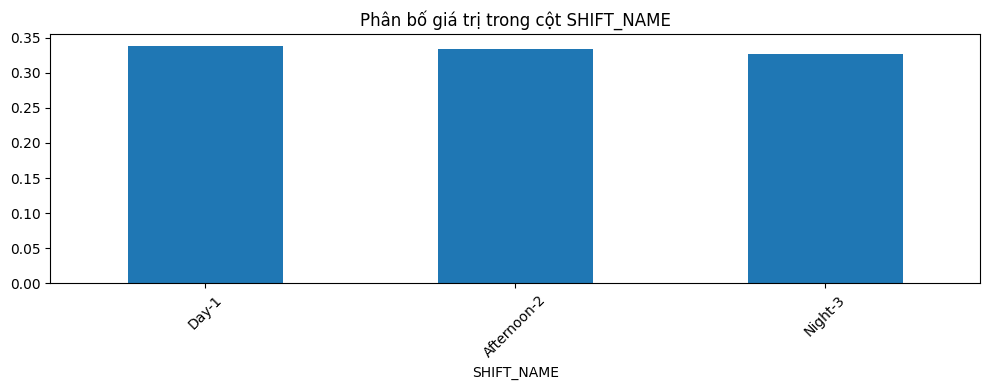

--------------------------------------------------

CO_TYPE:
Số lượng giá trị unique: 5
Số lượng null: 0

Top 10 giá trị phổ biến nhất:
CO_TYPE
Material_Handle      0.494998
Material_Filament    0.396598
Bundle_Material      0.055339
Tooling              0.031248
Unknown              0.021817
Name: proportion, dtype: float64


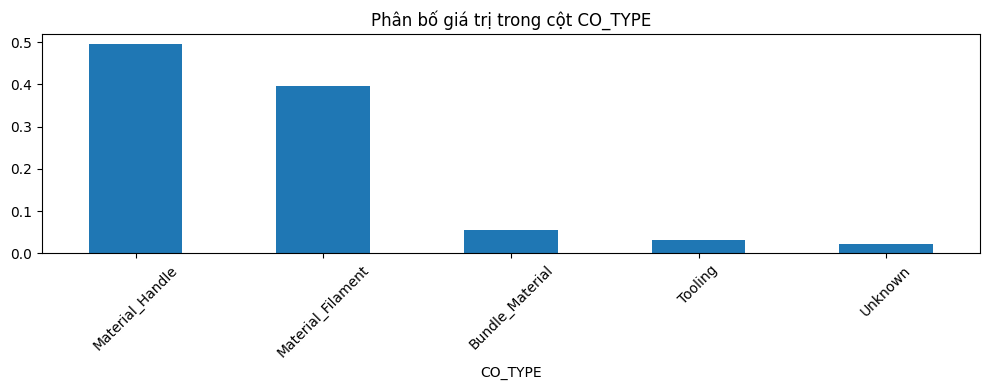

--------------------------------------------------

CREW_ID:
Số lượng giá trị unique: 3
Số lượng null: 0

Top 10 giá trị phổ biến nhất:
CREW_ID
C    0.34058
A    0.33038
B    0.32904
Name: proportion, dtype: float64


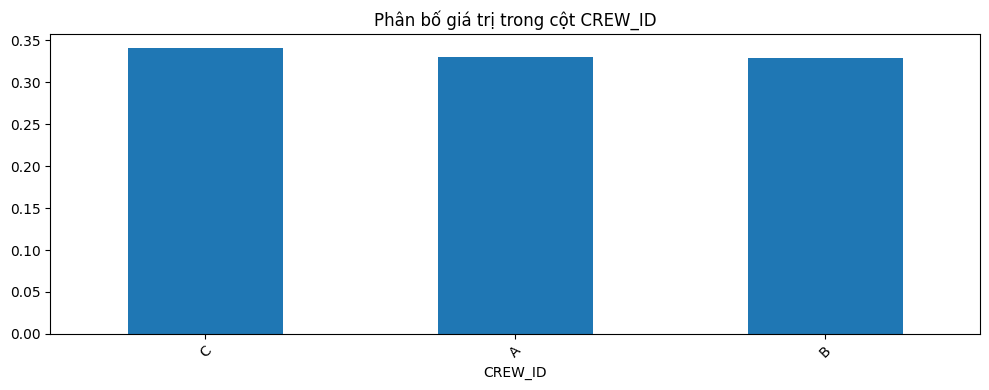

--------------------------------------------------

AE_MODEL_CATEGORY:
Số lượng giá trị unique: 5
Số lượng null: 0

Top 10 giá trị phổ biến nhất:
AE_MODEL_CATEGORY
Plant Decision       0.365737
Unplanned            0.338418
Runtime              0.120116
Unknown              0.116430
Business External    0.059299
Name: proportion, dtype: float64


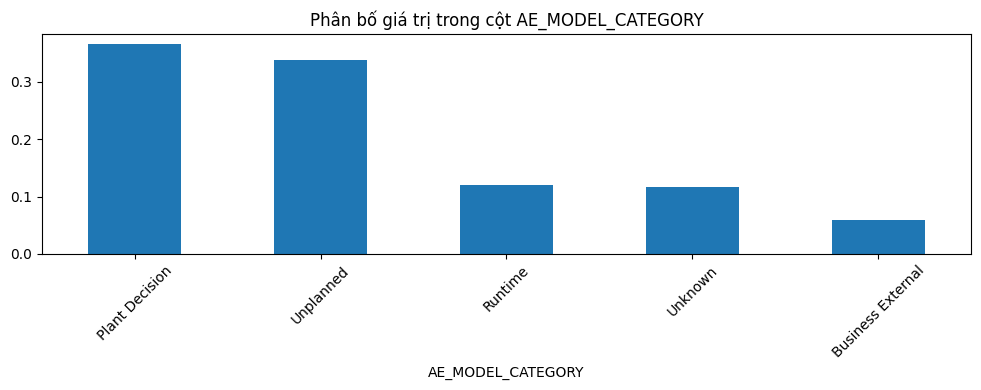

--------------------------------------------------

SIZE_TYPE:
Số lượng giá trị unique: 33
Số lượng null: 0

Top 10 giá trị phổ biến nhất:
SIZE_TYPE
Unknown                 0.375103
Total Defense Shield    0.101789
Classic Clean 100       0.083193
Deep Action White       0.051070
EcoFresh Plus           0.041781
Total Action Model S    0.041728
Pro-Clean 5000          0.032243
Super Soft Tech         0.028188
Renew 360               0.027670
PureMint Fresh          0.022739
Name: proportion, dtype: float64
--------------------------------------------------

UTIL_REASON_DESCRIPTION:
Số lượng giá trị unique: 526
Số lượng null: 0

Top 10 giá trị phổ biến nhất:
UTIL_REASON_DESCRIPTION
Running                                        0.120116
Unknown                                        0.116430
Planned Maintenance                            0.114948
Cleaning and Sanitation                        0.113233
Lunch/Break                                    0.069278
No Demand                     

In [ ]:
# Define categorical columns
categorical_columns = ['LINE_NAME', 'SHIFT_NAME', 'CO_TYPE', 'CREW_ID',
                      'AE_MODEL_CATEGORY', 'SIZE_TYPE', 'UTIL_REASON_DESCRIPTION']

# Generate detailed reports for each column
print("=== PHÂN TÍCH CÁC CỘT CATEGORICAL ===\n")
for col in categorical_columns:
    value_counts = production_df[col].value_counts(normalize = True)
    null_count = production_df[col].isna().sum()

    print(f"\n{col}:")
    print(f"Số lượng giá trị unique: {len(value_counts)}")
    print(f"Số lượng null: {null_count}")
    print("\nTop 10 giá trị phổ biến nhất:")
    print(value_counts.head(10))

    # Show distribution by histogram if number of unique values ​​< 20
    if len(value_counts) < 20:
        plt.figure(figsize=(10, 4))
        value_counts.plot(kind='bar')
        plt.title(f'Phân bố giá trị trong cột {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    print("-" * 50)

In [ ]:
production_df.isna().sum()

,0
PRODUCTIONDATE_DAY_LOC,0
SHIFT_NAME,0
LINE_NAME,0
CO_TYPE,0
CREW_ID,0
AE_MODEL_CATEGORY,0
SIZE_TYPE,0
SHIFT_NAME.1,0
UTIL_REASON_DESCRIPTION,0
DOWNTIME,0


In [ ]:
# Before dropping: check how many "Unknown" columns CO_TYPE and CREW_ID have
for col in ['CO_TYPE', 'CREW_ID']:
    n_unknown = (production_df[col] == 'Unknown').sum()
    pct_unknown = n_unknown / len(production_df) * 100
    print(f"{col}: {n_unknown} dòng ({pct_unknown:.2f}%) là 'Unknown'")

# Drop all rows with 'Unknown' in these 2 columns
production_df = production_df[~(
    (production_df['CO_TYPE'] == 'Unknown') |
    (production_df['CREW_ID'] == 'Unknown')
)].reset_index(drop=True)

# After dropping
print("\nSau khi drop:")
print(f"Số dòng còn lại: {len(production_df):,}")

CO_TYPE: 3664 dòng (2.18%) là 'Unknown'
CREW_ID: 0 dòng (0.00%) là 'Unknown'

Sau khi drop:
Số dòng còn lại: 164,282


In [ ]:
production_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164282 entries, 0 to 164281
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   PRODUCTIONDATE_DAY_LOC     164282 non-null  object 
 1   SHIFT_NAME                 164282 non-null  object 
 2   LINE_NAME                  164282 non-null  object 
 3   CO_TYPE                    164282 non-null  object 
 4   CREW_ID                    164282 non-null  object 
 5   AE_MODEL_CATEGORY          164282 non-null  object 
 6   SIZE_TYPE                  164282 non-null  object 
 7   SHIFT_NAME.1               164282 non-null  object 
 8   UTIL_REASON_DESCRIPTION    164282 non-null  object 
 9   DOWNTIME                   164282 non-null  int64  
 10  EFFECTIVE_RUNTIME          164282 non-null  float64
 11  GOOD_PRODUCTION_QTY        164282 non-null  int64  
 12  LUNCH_AND_BREAK            164282 non-null  int64  
 13  MEETING_AND_TRAINING       16

In [ ]:
production_df.shape

(164282, 27)

## Maintenance Dataset

In [ ]:
maintenance_df.head()

,ORDER,BASIC_START_DATE,EQUIPMENT_ID,ORDER_TYPE,DESCRIPTION
0,10326837,2025-08-29,10005199,PM10,RM TF1E0701
1,10326837,2025-08-29,10005199,PM10,RM TF1E0701
2,10326834,2025-08-26,10027683,PM10,RM TF1HPT04
3,10326834,2025-08-26,10027683,PM10,RM TF1HPT04
4,10263657,2025-04-05,10005200,PM10,RM TF1E0702


In [ ]:
maintenance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ORDER             388 non-null    int64 
 1   BASIC_START_DATE  388 non-null    object
 2   EQUIPMENT_ID      388 non-null    int64 
 3   ORDER_TYPE        388 non-null    object
 4   DESCRIPTION       388 non-null    object
dtypes: int64(2), object(3)
memory usage: 15.3+ KB


In [ ]:
# 1. Check duplicate data
print("Checking duplicates:")
print("Maintenance duplicates:", maintenance_df.duplicated().sum())

# Eliminate duplicate data
maintenance_df = maintenance_df.drop_duplicates()

Checking duplicates:
Maintenance duplicates: 194


In [ ]:
maintenance_df['BASIC_START_DATE'] = pd.to_datetime(
    maintenance_df['BASIC_START_DATE'],
    format='mixed',     # allow many different formats # if parse failed return NaT
    dayfirst=True       # dd/mm/YYYY format preferred
)

In [ ]:
# 2. Check and handle missing values
print("\nMissing values in maintenance_df:")
print(maintenance_df.isnull().sum())

# 3. Time data processing
maintenance_df['BASIC_START_DATE'] = pd.to_datetime(maintenance_df['BASIC_START_DATE'])
production_df['PRODUCTIONDATE_DAY_LOC'] = pd.to_datetime(production_df['PRODUCTIONDATE_DAY_LOC'])


Missing values in maintenance_df:
ORDER               0
BASIC_START_DATE    0
EQUIPMENT_ID        0
ORDER_TYPE          0
DESCRIPTION         0
dtype: int64


In [ ]:
maintenance_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 0 to 386
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDER             194 non-null    int64         
 1   BASIC_START_DATE  194 non-null    datetime64[ns]
 2   EQUIPMENT_ID      194 non-null    int64         
 3   ORDER_TYPE        194 non-null    object        
 4   DESCRIPTION       194 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 9.1+ KB


In [ ]:
# maintenance_df is cleaned, pass datetime, duplicate type
maintenance_df = maintenance_df.sort_values(['EQUIPMENT_ID', 'BASIC_START_DATE'])

# Step 1: Calculate the number of days between maintenance
maintenance_df['days_since_last'] = (
    maintenance_df.groupby('EQUIPMENT_ID')['BASIC_START_DATE']
    .diff()
    .dt.days
)

# Step 2: Summarize data for each device
numeric_summary = (
    maintenance_df.groupby('EQUIPMENT_ID')
    .agg(
        total_orders=('ORDER', 'nunique'),
        first_date=('BASIC_START_DATE', 'min'),
        last_date=('BASIC_START_DATE', 'max'),
        avg_days_between_maintenance=('days_since_last', 'mean'),

    )
    .reset_index()
)

In [ ]:
categorical_info = (
    maintenance_df[['EQUIPMENT_ID', 'ORDER_TYPE', 'DESCRIPTION']]
    .drop_duplicates(subset=['EQUIPMENT_ID'])
)

maintenance_summary = pd.merge(
    numeric_summary,
    categorical_info,
    on='EQUIPMENT_ID',
    how='left'
)

In [ ]:
maintenance_summary

,EQUIPMENT_ID,total_orders,first_date,last_date,avg_days_between_maintenance,ORDER_TYPE,DESCRIPTION
0,10003386,5,2025-02-21,2025-08-22,45.500000,PM10,RM TF1E0101
1,10003387,3,2025-03-03,2025-07-24,71.500000,PM10,RM TF1E0102
2,10003394,4,2025-02-17,2025-08-28,64.000000,PM10,RM TF1E0201
3,10003395,3,2025-02-18,2025-07-21,76.500000,PM10,RM TF1E0202
4,10003402,3,2025-02-27,2025-07-22,72.500000,PM10,RM TF1E0301
5,10003403,3,2025-02-26,2025-07-04,64.000000,PM10,RM TF1E0302
6,10003404,3,2025-02-19,2025-06-26,63.500000,PM10,RM TF1E2001
7,10003405,3,2025-03-05,2025-07-15,66.000000,PM10,RM TF1E2002
8,10003406,3,2025-02-19,2025-08-16,89.000000,PM10,RM TF1E2003
9,10003407,3,2025-03-20,2025-08-15,74.000000,PM10,RM TF1E2004


## Cross_reference Dataset

In [ ]:
cross_ref_df.head()

,EQUIPMENT_ID,OPERA NAME
0,10003380,MKTU0101
1,10003381,MKTU0102
2,10003382,MKTU0103
3,10003383,MKTU0104
4,10003384,MKTU0105


In [ ]:
cross_ref_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   EQUIPMENT_ID  158 non-null    int64 
 1   OPERA NAME    158 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.6+ KB


In [ ]:
# 1. Check and handle duplicate data
print("Checking duplicates:")
print("Cross reference duplicates:", cross_ref_df.duplicated().sum())

Checking duplicates:
Cross reference duplicates: 0


In [ ]:
cross_ref_summary = (
    cross_ref_df.groupby('OPERA NAME', as_index=False)
      .agg(total_equipment_id=('EQUIPMENT_ID', 'count'))
)
cross_ref_df = cross_ref_df.merge(cross_ref_summary, on='OPERA NAME', how='left')

In [ ]:
cross_ref_df

,EQUIPMENT_ID,OPERA NAME,total_equipment_id
0,10003380,MKTU0101,1
1,10003381,MKTU0102,1
2,10003382,MKTU0103,1
3,10003383,MKTU0104,1
4,10003384,MKTU0105,1
...,...,...,...
153,10027691,MHPT2305,2
154,10028002,MHPT2306,2
155,10028003,MHPT2307,2
156,10028004,MHPT2306,2


In [ ]:
df_merge = pd.merge(
    maintenance_summary,
    cross_ref_df,
    on='EQUIPMENT_ID',
    how='left' # Use left join to keep all machines in the reference table
)
print("--- BƯỚC 3: Merge df với df_merge ---")
print("Số hàng của df trước khi merge:", len(production_df))

--- BƯỚC 3: Merge df với df_merge ---
Số hàng của df trước khi merge: 164282


In [ ]:
df_merge[df_merge['OPERA NAME'] == "MHPT2301"]

,EQUIPMENT_ID,total_orders,first_date,last_date,avg_days_between_maintenance,ORDER_TYPE,DESCRIPTION,OPERA NAME,total_equipment_id
46,10027359,4,2025-03-01,2025-08-12,54.666667,PM10,RM TF1HPT01,MHPT2301,2.0


In [ ]:
final_df = pd.merge(
    production_df,
    df_merge,
    left_on='LINE_NAME',
    right_on='OPERA NAME',
    how='left'
)

In [ ]:
final_df.isna().sum()

,0
PRODUCTIONDATE_DAY_LOC,0
SHIFT_NAME,0
LINE_NAME,0
CO_TYPE,0
CREW_ID,0
AE_MODEL_CATEGORY,0
SIZE_TYPE,0
SHIFT_NAME.1,0
UTIL_REASON_DESCRIPTION,0
DOWNTIME,0


In [ ]:
final_df.columns

Index(['PRODUCTIONDATE_DAY_LOC', 'SHIFT_NAME', 'LINE_NAME', 'CO_TYPE',
       'CREW_ID', 'AE_MODEL_CATEGORY', 'SIZE_TYPE', 'SHIFT_NAME.1',
       'UTIL_REASON_DESCRIPTION', 'DOWNTIME', 'EFFECTIVE_RUNTIME',
       'GOOD_PRODUCTION_QTY', 'LUNCH_AND_BREAK', 'MEETING_AND_TRAINING',
       'NO_DEMAND', 'PLANT_AVAILABLE_TIME', 'PLANT_EXPERIMENTATION',
       'PRODUCTION_AVAILABLE_TIME', 'REJECT_PRODUCTION_QTY', 'RUN_TIME',
       'CHANGEOVER_DURATION', 'CLEANING_AND_SANITIZATION',
       'BUSINESS_EXTERNAL_TIME', 'PLANNED_MAINTENANCE', 'TOTAL_TIME',
       'WAITING_TIME', 'PRODUCTION_ORDER_RATE', 'EQUIPMENT_ID', 'total_orders',
       'first_date', 'last_date', 'avg_days_between_maintenance', 'ORDER_TYPE',
       'DESCRIPTION', 'OPERA NAME', 'total_equipment_id'],
      dtype='object')

<Axes: >

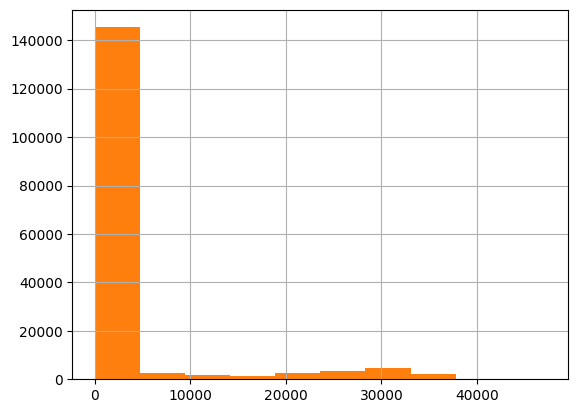

In [ ]:
final_df['Ideal_cycle_time'] = np.where((final_df['PRODUCTION_ORDER_RATE'] > 0) & (~final_df['PRODUCTION_ORDER_RATE'].isna()), 1 / final_df['PRODUCTION_ORDER_RATE'], 0)
final_df['Total_Production_Qty'] = final_df['GOOD_PRODUCTION_QTY'] + final_df['REJECT_PRODUCTION_QTY']
final_df['Performance'] = (final_df['Ideal_cycle_time'] * final_df['Total_Production_Qty']) / final_df['RUN_TIME']

final_df['Ideal_cycle_time'].hist()
final_df['Total_Production_Qty'].hist()

In [ ]:
final_df

,PRODUCTIONDATE_DAY_LOC,SHIFT_NAME,LINE_NAME,CO_TYPE,CREW_ID,AE_MODEL_CATEGORY,SIZE_TYPE,SHIFT_NAME.1,UTIL_REASON_DESCRIPTION,DOWNTIME,...,first_date,last_date,avg_days_between_maintenance,ORDER_TYPE,DESCRIPTION,OPERA NAME,total_equipment_id,Ideal_cycle_time,Total_Production_Qty,Performance
0,2025-01-01,Afternoon-2,MAFT2201,Material_Handle,C,Business External,Unknown,Afternoon-2,Holiday,0,...,2025-02-19,2025-08-15,35.4,PM10,RM TF1AFT01,MAFT2201,1.0,0.000000,0,NaN
1,2025-01-01,Day-1,MAFT2201,Material_Handle,B,Business External,Unknown,Day-1,Holiday,0,...,2025-02-19,2025-08-15,35.4,PM10,RM TF1AFT01,MAFT2201,1.0,0.000000,0,NaN
2,2025-01-01,Night-3,MAFT2201,Material_Handle,A,Business External,Unknown,Night-3,Holiday,0,...,2025-02-19,2025-08-15,35.4,PM10,RM TF1AFT01,MAFT2201,1.0,0.000000,0,NaN
3,2025-01-02,Afternoon-2,MAFT2201,Material_Handle,A,Plant Decision,Unknown,Afternoon-2,Lunch/Break,0,...,2025-02-19,2025-08-15,35.4,PM10,RM TF1AFT01,MAFT2201,1.0,0.000000,0,NaN
4,2025-01-02,Afternoon-2,MAFT2201,Material_Handle,A,Unplanned,Renew 360,Afternoon-2,12-Filling tool - 1201-Mechanical adjustment.,17,...,2025-02-19,2025-08-15,35.4,PM10,RM TF1AFT01,MAFT2201,1.0,0.041667,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164277,2025-06-29,Day-1,MKZA1802,Material_Handle,C,Business External,Unknown,Day-1,Weekend,0,...,2025-03-08,2025-06-11,47.5,PM10,RM TF1E1802/E1801,MKZA1802,1.0,0.000000,0,NaN
164278,2025-06-29,Night-3,MKZA1802,Material_Handle,B,Business External,Unknown,Night-3,Weekend,0,...,2025-03-08,2025-06-11,47.5,PM10,RM TF1E1802/E1801,MKZA1802,1.0,0.000000,0,NaN
164279,2025-06-30,Afternoon-2,MKZA1802,Material_Handle,B,Business External,Unknown,Afternoon-2,No Demand,0,...,2025-03-08,2025-06-11,47.5,PM10,RM TF1E1802/E1801,MKZA1802,1.0,0.000000,0,NaN
164280,2025-06-30,Day-1,MKZA1802,Material_Handle,A,Business External,Unknown,Day-1,No Demand,0,...,2025-03-08,2025-06-11,47.5,PM10,RM TF1E1802/E1801,MKZA1802,1.0,0.000000,0,NaN


In [ ]:
# Export final clean file to csv
final_df.to_csv('clean_final_df.csv', index=False)

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164282 entries, 0 to 164281
Data columns (total 39 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   PRODUCTIONDATE_DAY_LOC        164282 non-null  datetime64[ns]
 1   SHIFT_NAME                    164282 non-null  object        
 2   LINE_NAME                     164282 non-null  object        
 3   CO_TYPE                       164282 non-null  object        
 4   CREW_ID                       164282 non-null  object        
 5   AE_MODEL_CATEGORY             164282 non-null  object        
 6   SIZE_TYPE                     164282 non-null  object        
 7   SHIFT_NAME.1                  164282 non-null  object        
 8   UTIL_REASON_DESCRIPTION       164282 non-null  object        
 9   DOWNTIME                      164282 non-null  int64         
 10  EFFECTIVE_RUNTIME             164282 non-null  float64       
 11  GOOD_PRODUCTI